# <center>  Python for biologists

## Lecture 10, Pandas
11.11.2023


> Nikita Vaulin, vaulin@ro.ru, tg: @nvaulin
    

---

<a href="https://pandas.pydata.org/">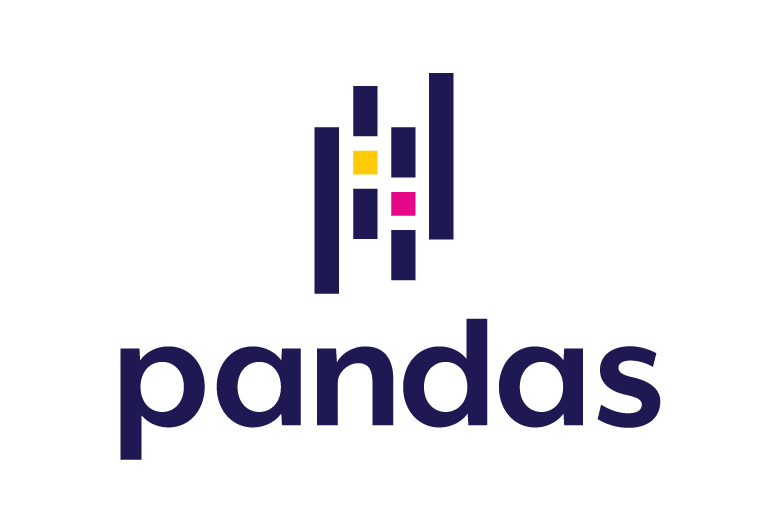</a>
## Pandas: Python Data Analysis Library

Основаная библиотека для работы с дата-фреймами в python


In [ ]:
! pip install pandas

In [2]:
import numpy as np
import pandas as pd

Ключевая структурная единица - `pd.Series`

In [3]:
print([10, 20, 30])
print(np.array([10, 20, 30]))
print(pd.Series([10, 20, 30]))

[10, 20, 30]
[10 20 30]
0    10
1    20
2    30
dtype: int64


In [4]:
var = pd.Series([10, '20', True])
print(var)

0      10
1      20
2    True
dtype: object


In [5]:
np.array([10, '20', True])

array(['10', '20', 'True'], dtype='<U21')

In [6]:
type(var[1])

str

In [7]:
type(var[0])

int

In [8]:
pd.Series([10, 20, True], dtype='int64')

0    10
1    20
2     1
dtype: int64

In [9]:
var.index

RangeIndex(start=0, stop=3, step=1)

In [10]:
var

0      10
1      20
2    True
dtype: object

In [11]:
print(pd.Series([10, 20, 30], index=['apple', 'banana', 'garlic']))

apple     10
banana    20
garlic    30
dtype: int64


In [12]:
var = pd.Series([10, 20, 30], index=['apple', 'banana', 'garlic'])

In [13]:
var.to_dict()

{'apple': 10, 'banana': 20, 'garlic': 30}

In [14]:
var['apple'] = 9

In [15]:
var

apple      9
banana    20
garlic    30
dtype: int64

## Working with datasets

Sources:

- [Titanic](https://www.kaggle.com/competitions/titanic/overview)
- [Olympics](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)
- [Students Stress Survey](https://www.kaggle.com/datasets/samyakb/student-stress-factors/)
- [Second Wizard War](https://www.kaggle.com/datasets/sheikhsohelmoon/harry-potters-second-wizard-war-dataset)
- [Russian Elections 2018](https://www.kaggle.com/datasets/rexhaif/ru-elections-2018)
- [CTCF and SMC3 ChIP-seqs](https://www.encodeproject.org/search/?type=Experiment&replicates.library.biosample.donor.organism.scientific_name=Homo+sapiens&biosample_ontology.classification=primary+cell&biosample_ontology.classification=cell+line&biosample_ontology.classification=in+vitro+differentiated+cells&assay_title=TF+ChIP-seq&biosample_ontology.term_name=neural+cell) 


In [16]:
data_dir = 'https://raw.githubusercontent.com/Python-BI-2023/course_materials/main/data/'
bed_colnames = ('chr', 'start', 'stop', 'name', 'score', 'strand', 'signalValue', 'pValue', 'qValue', 'peak')
students_stress = pd.read_csv(data_dir + 'students_stress_survey.csv')
titanic = pd.read_csv(data_dir + 'titanic.csv')
olympics = pd.read_csv('https://github.com/cleuer/olympics/raw/master/src/main/resources/olympic_history_120_years.csv')
second_wiz_war = pd.read_csv(data_dir + 'second_wizard_war.csv')
rus_elections = pd.read_csv(data_dir + 'russian_elections_2018.csv')
ctcf = pd.read_csv(data_dir + 'CTCF_neurons.bed', sep='\t', header=None, names=bed_colnames)
smc = pd.read_csv(data_dir + 'SMC3_neurons.bed', sep='\t', header=None, names=bed_colnames)

In [17]:
titanic = pd.read_csv(data_dir + 'titanic.csv')

In [18]:
titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [19]:
pd.read_csv(data_dir + 'SMC3_neurons.bed', sep='\t', header=None, names=bed_colnames) # bed narrowPeak

,chr,start,stop,name,score,strand,signalValue,pValue,qValue,peak
0,chr18,47748909,47749704,.,1000,.,3415.07184,-1.0,4.66501,391
1,chr11,66408273,66409074,.,1000,.,3406.02991,-1.0,4.66501,366
2,chr3,184561033,184561798,.,1000,.,3301.53779,-1.0,4.66501,393
3,chr1,203701817,203702620,.,1000,.,3218.67645,-1.0,4.66501,428
4,chr16,77235854,77236636,.,1000,.,3213.11206,-1.0,4.66501,390
...,...,...,...,...,...,...,...,...,...,...
50017,chr16,27456965,27457612,.,1000,.,12.46099,-1.0,0.29982,546
50018,chr11,109425683,109426213,.,1000,.,12.45984,-1.0,0.29976,265
50019,chr6,165663194,165663724,.,750,.,12.45954,-1.0,0.29974,265
50020,chr1,25905125,25905655,.,562,.,12.45717,-1.0,0.29958,265


In [20]:
titanic.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [21]:
titanic.tail(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [22]:
titanic.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
253,1145,3,"Salander, Mr. Karl Johan",male,24.0,0,0,7266,9.3250,NaN,S
190,1082,2,"Angle, Mr. William A",male,34.0,1,0,226875,26.0000,NaN,S
301,1193,2,"Malachard, Mr. Noel",male,NaN,0,0,237735,15.0458,D,C


In [23]:
titanic.size

4598

In [24]:
titanic.shape

(418, 11)

In [25]:
titanic.shape[0]

418

In [26]:
len(titanic)

418

In [27]:
titanic.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
titanic.index

RangeIndex(start=0, stop=418, step=1)

[Чуть больше](https://dfedorov.spb.ru/pandas/%D0%9E%D0%B1%D0%B7%D0%BE%D1%80%20%D1%82%D0%B8%D0%BF%D0%BE%D0%B2%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20pandas.html) про типы данных:

<table>
<thead><tr>
<th>Pandas</th>
<th>Python</th>
<th>NumPy</th>
<th>Использование</th>
</tr>
</thead>
<tbody>
<tr>
<td>object</td>
<td>str или смесь</td>
<td>string<em>, unicode</em>, смешанные типы</td>
<td>Текстовые или смешанные числовые и нечисловые значения</td>
</tr>
<tr>
<td>int64</td>
<td>int</td>
<td>int_, int8, int16, int32, int64, uint8, uint16, uint32, uint64</td>
<td>Целые числа</td>
</tr>
<tr>
<td>float64</td>
<td>float</td>
<td>float_, float16, float32, float64</td>
<td>Числа с плавающей точкой</td>
</tr>
<tr>
<td>bool</td>
<td>bool</td>
<td>bool_</td>
<td>Значения True/False</td>
</tr>
<tr>
<td>datetime64</td>
<td>datetime</td>
<td>datetime64[ns]</td>
<td>Значения даты и времени</td>
</tr>
<tr>
<td>timedelta[ns]</td>
<td>NA</td>
<td>NA</td>
<td>Разность между двумя datetimes</td>
</tr>
<tr>
<td>category</td>
<td>NA</td>
<td>NA</td>
<td>Ограниченный список текстовых значений</td>
</tr>
</tbody>
</table>

## Отбор данных

- По столбцам

In [30]:
titanic['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [31]:
type(titanic['Age'])

pandas.core.series.Series

In [32]:
columns_to_select = ['Name', 'Age']
titanic[columns_to_select].sample(3)

,Name,Age
220,"Duran y More, Miss. Florentina",30.0
257,"Niklasson, Mr. Samuel",28.0
207,"Collett, Mr. Sidney C Stuart",24.0


In [33]:
titanic[['Age', 'Name']].sample(3)

,Age,Name
220,30.0,"Duran y More, Miss. Florentina"
101,27.0,"Weisz, Mr. Leopold"
320,26.0,"Andersson, Mr. Johan Samuel"


In [34]:
type(titanic[['Age']])

pandas.core.frame.DataFrame

In [35]:
titanic['Age'].head(3)

0    34.5
1    47.0
2    62.0
Name: Age, dtype: float64

In [36]:
titanic[['Age']].head(3)

,Age
0,34.5
1,47.0
2,62.0


- По строкам

In [37]:
titanic.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [38]:
titanic.loc[0:3]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


- Комбинированно

In [39]:
titanic.loc[:3, 'Name']

0                    Kelly, Mr. James
1    Wilkes, Mrs. James (Ellen Needs)
2           Myles, Mr. Thomas Francis
3                    Wirz, Mr. Albert
Name: Name, dtype: object

In [40]:
titanic.loc[:3, ['Name', 'Age']]

,Name,Age
0,"Kelly, Mr. James",34.5
1,"Wilkes, Mrs. James (Ellen Needs)",47.0
2,"Myles, Mr. Thomas Francis",62.0
3,"Wirz, Mr. Albert",27.0


In [41]:
titanic.loc[:3, 'Name':'Age']

,Name,Sex,Age
0,"Kelly, Mr. James",male,34.5
1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0
2,"Myles, Mr. Thomas Francis",male,62.0
3,"Wirz, Mr. Albert",male,27.0


- `iloc` vs `loc` - "integer-location"

In [42]:
titanic.loc[:3] # по "именам" строк

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [43]:
titanic.iloc[:3] # по номерам строк

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [44]:
titanic2 = pd.read_csv(data_dir + 'titanic.csv', index_col='PassengerId')

In [45]:
pd.read_csv(data_dir + 'titanic.csv', index_col='Name').head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,
"Kelly, Mr. James",892,3,male,34.5,0,0,330911,7.8292,NaN,Q
"Wilkes, Mrs. James (Ellen Needs)",893,3,female,47.0,1,0,363272,7.0000,NaN,S
"Myles, Mr. Thomas Francis",894,2,male,62.0,0,0,240276,9.6875,NaN,Q
"Wirz, Mr. Albert",895,3,male,27.0,0,0,315154,8.6625,NaN,S
"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",896,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
titanic2.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
titanic2.loc[892]

Pclass                     3
Name        Kelly, Mr. James
Sex                     male
Age                     34.5
SibSp                      0
Parch                      0
Ticket                330911
Fare                  7.8292
Cabin                    NaN
Embarked                   Q
Name: 892, dtype: object

In [48]:
titanic.iloc[:, :4]

,PassengerId,Pclass,Name,Sex
0,892,3,"Kelly, Mr. James",male
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female
2,894,2,"Myles, Mr. Thomas Francis",male
3,895,3,"Wirz, Mr. Albert",male
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female
...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male
414,1306,1,"Oliva y Ocana, Dona. Fermina",female
415,1307,3,"Saether, Mr. Simon Sivertsen",male
416,1308,3,"Ware, Mr. Frederick",male


In [49]:
titanic.index

RangeIndex(start=0, stop=418, step=1)

In [50]:
titanic['Pclass']

0      3
1      3
2      2
3      3
4      3
      ..
413    3
414    1
415    3
416    3
417    3
Name: Pclass, Length: 418, dtype: int64

In [51]:
titanic.Pclass # passanger class

0      3
1      3
2      2
3      3
4      3
      ..
413    3
414    1
415    3
416    3
417    3
Name: Pclass, Length: 418, dtype: int64

## Фильтрация

In [52]:
titanic['Pclass'] == 3

0       True
1       True
2      False
3       True
4       True
       ...  
413     True
414    False
415     True
416     True
417     True
Name: Pclass, Length: 418, dtype: bool

In [53]:
titanic[titanic['Pclass'] == 3]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [54]:
titanic.query('Pclass == 3') #SQL

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [55]:
titanic.query('Name == "Kelly, Mr. James"') 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [56]:
titanic.query('Pclass == 3 and SibSp == 0') #SQL

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [57]:
titanic.query('SibSp == Parch') 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [58]:
name = "Kelly, Mr. James"
titanic.query('Name == @name') 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


## Работа с данными

In [62]:
titanic.shape

(418, 11)

In [63]:
titanic.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
218,1110,1,"Widener, Mrs. George Dunton (Eleanor Elkins)",female,50.0,1,1,113503,211.5,C80,C
78,970,2,"Aldworth, Mr. Charles Augustus",male,30.0,0,0,248744,13.0,NaN,S
338,1230,2,"Denbury, Mr. Herbert",male,25.0,0,0,C.A. 31029,31.5,NaN,S


In [64]:
titanic.Pclass * 2

0      6
1      6
2      4
3      6
4      6
      ..
413    6
414    2
415    6
416    6
417    6
Name: Pclass, Length: 418, dtype: int64

In [67]:
#titanic.drop(columns=['Ticket'], inplace=True) # inplace
titanic = titanic.drop(columns=['Ticket'], inplace=False) 

In [69]:
titanic[['Pclass', 'Age']].sum(axis=0)

Pclass      947.0
Age       10050.5
dtype: float64

In [70]:
titanic[['Pclass', 'Age']].std(axis=0)

Pclass     0.841838
Age       14.181209
dtype: float64

In [71]:
titanic[['Pclass', 'Age']].var(axis=0)

Pclass      0.708690
Age       201.106695
dtype: float64

In [72]:
titanic[['Pclass', 'Age']].sem(axis=0)

Pclass    0.041176
Age       0.778295
dtype: float64

In [74]:
titanic[['Pclass', 'SibSp']].value_counts()

Pclass  SibSp
3       0        160
2       0         62
1       0         61
        1         42
3       1         41
2       1         27
3       2          7
2       2          4
3       4          4
1       2          3
3       3          3
        8          2
1       3          1
3       5          1
Name: count, dtype: int64

In [78]:
titanic.Pclass.value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [79]:
titanic.query('SibSp == 8') # siblings Sуpруги

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,69.55,NaN,S
360,1252,3,"Sage, Master. William Henry",male,14.5,8,2,69.55,NaN,S


In [80]:
titanic.isna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,True,False


In [84]:
titanic.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [87]:
titanic.shape

(418, 10)

In [89]:
titanic.dropna(axis=0, subset=['Fare']).shape

(417, 10)

In [88]:
titanic.dropna(axis=1).shape

(418, 7)

In [ ]:
# случайные , не-случайные и абсолютно не-случайные 

In [92]:
olympics.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [94]:
olympics.Medal.value_counts(dropna=False)

Medal
NaN       231333
Gold       13372
Bronze     13295
Silver     13116
Name: count, dtype: int64

In [96]:
titanic.drop_duplicates()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S


In [98]:
all(titanic.duplicated()) #3

False

In [99]:
titanic.duplicated().all() #1 # %>% %>% %>%

False

In [100]:
titanic.duplicated().sum() #2 

0

In [102]:
titanic.Fare

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [ ]:
...

In [ ]:
titanic.Fare / titanic.Fare.max()

In [104]:
(titanic.Fare - titanic.Fare.mean()) / titanic.Fare.std()

0     -0.497213
1     -0.512045
2     -0.463974
3     -0.482308
4     -0.417469
         ...   
413   -0.493264
414    1.310606
415   -0.507573
416   -0.493264
417   -0.237336
Name: Fare, Length: 418, dtype: float64

In [103]:
titanic.Fare.max() - titanic.Fare.min()

512.3292

In [105]:
titanic.Pclass.max() - titanic.Pclass.min()

2

In [106]:
def normalise(vec):
    return (vec - np.mean(vec))/ np.std(vec)

In [108]:
normalise(titanic.Fare)

0     -0.497811
1     -0.512660
2     -0.464532
3     -0.482888
4     -0.417971
         ...   
413   -0.493856
414    1.312180
415   -0.508183
416   -0.493856
417   -0.237621
Name: Fare, Length: 418, dtype: float64

 ---
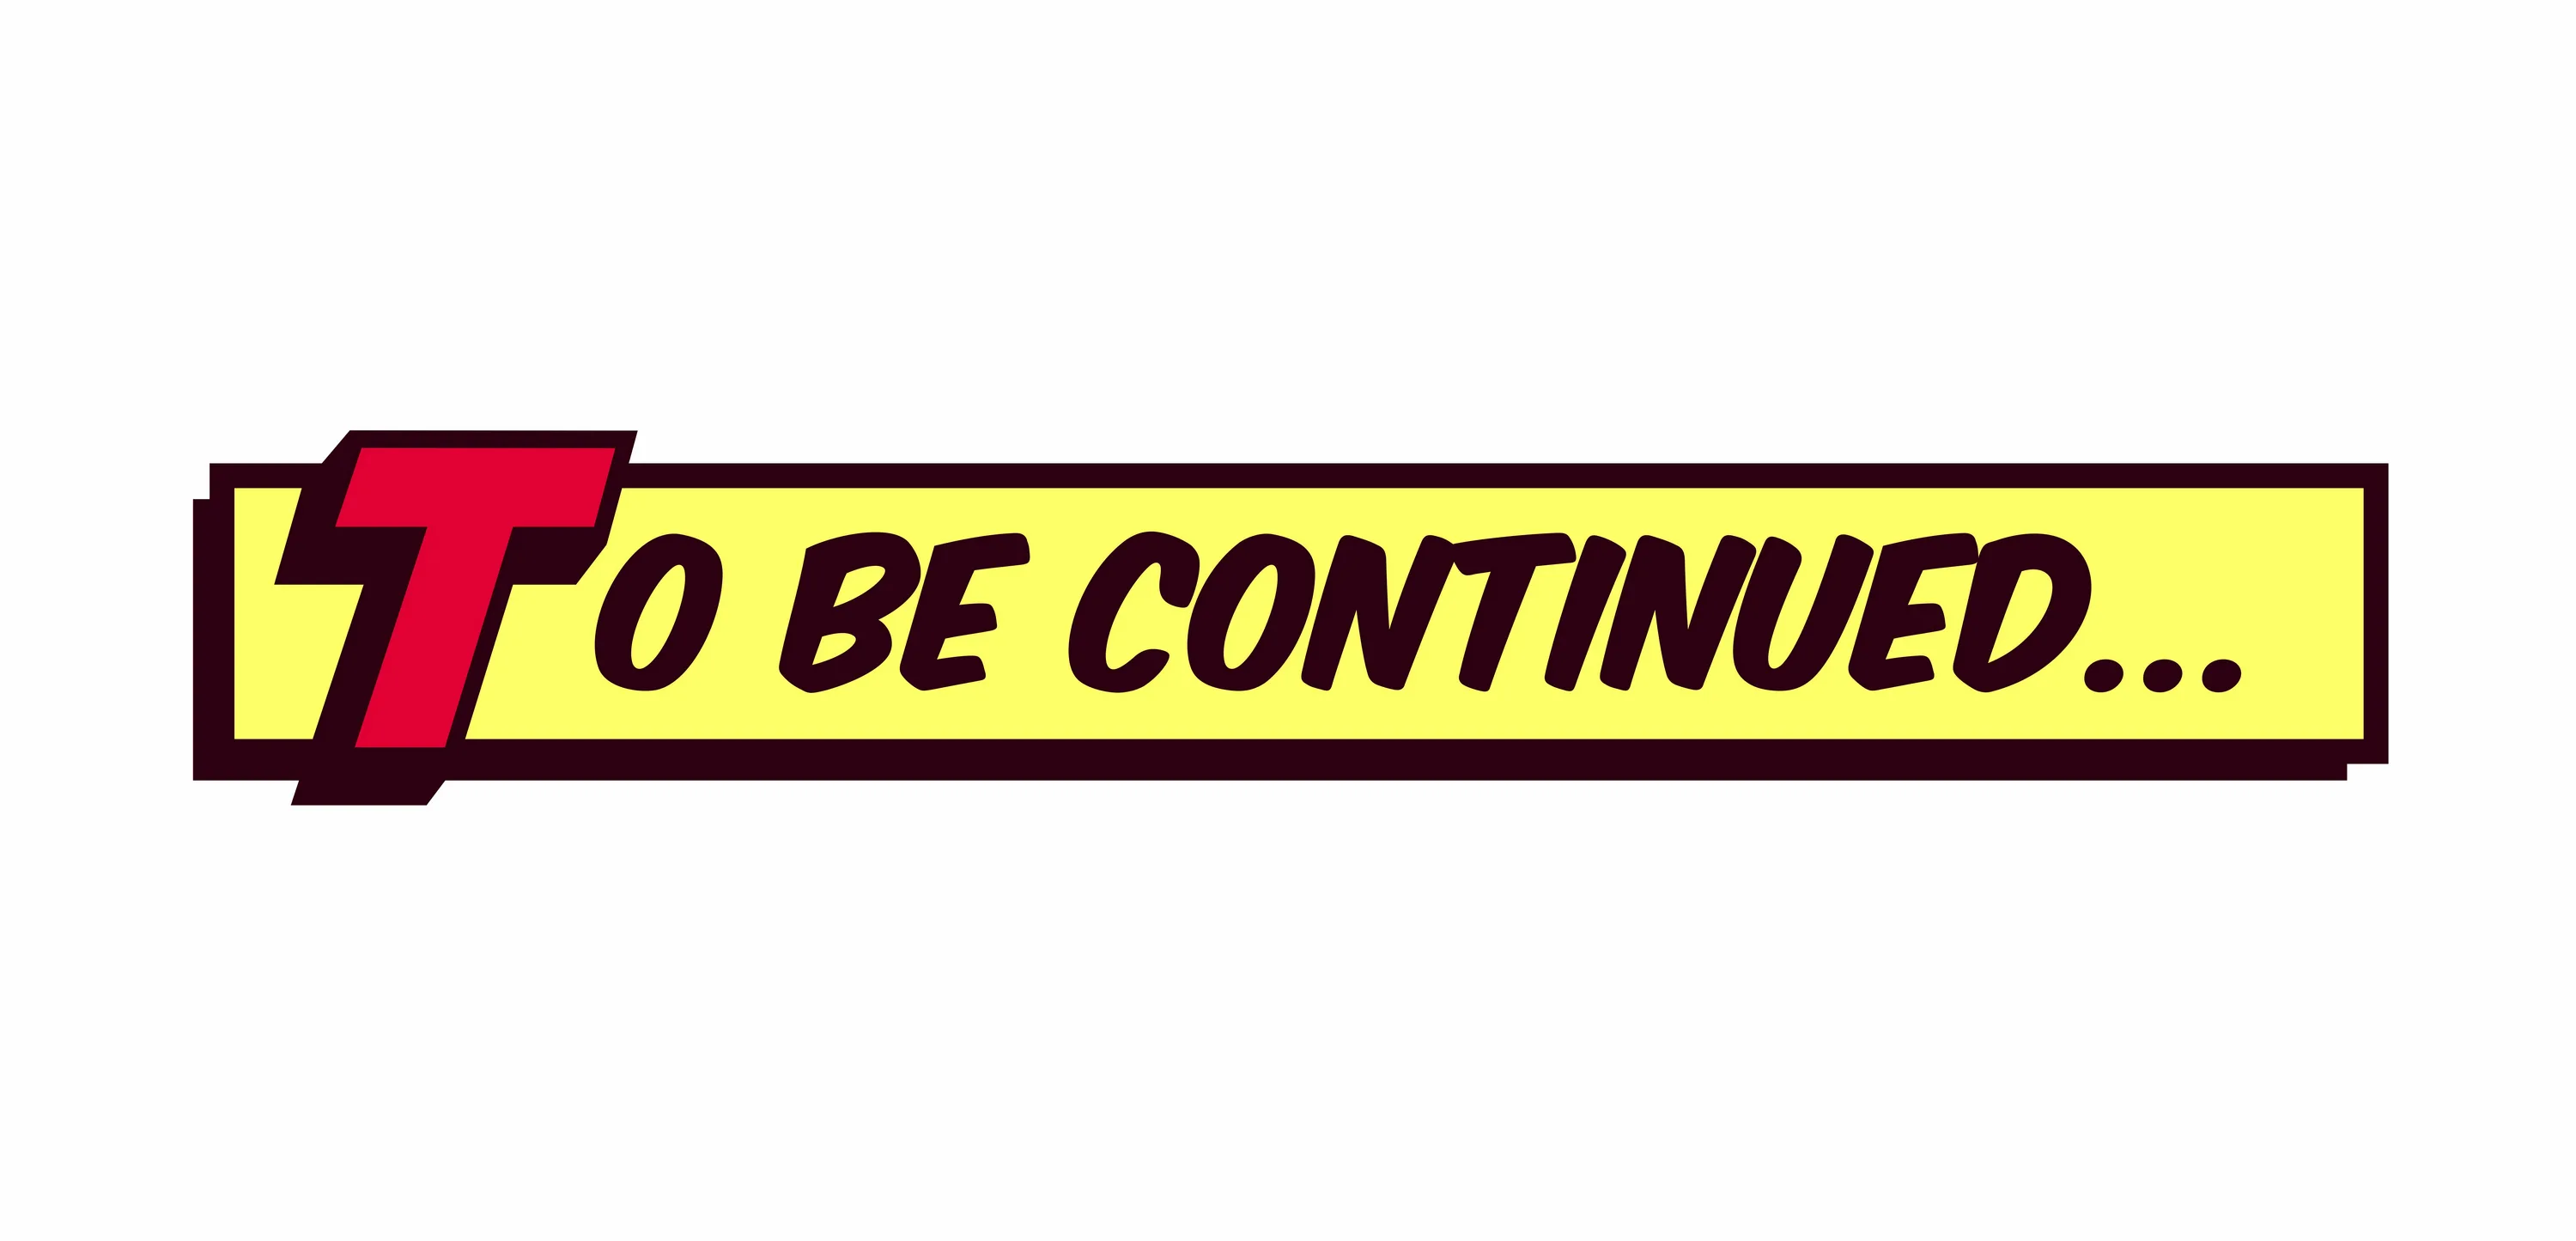
 ---

- `apply` - по строкам/столбцам

- `map` - к каждому элементу отдельно (`applymap` before 2.1.0)

- `groupby-aggregate`

## Ацессоры (аттрибуты доступа)

- `str`

- `cat`

- `dt`, [dates formats](https://docs.python.org/3/library/datetime.html#datetime.timezone)

## Полезные функции

- `pd.crosstab`, `pd.pivot_table`

- `pd.qcut`

- `pd.DataFrame.rename`

## Слияние датафреймов